Distribution des classes :
target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


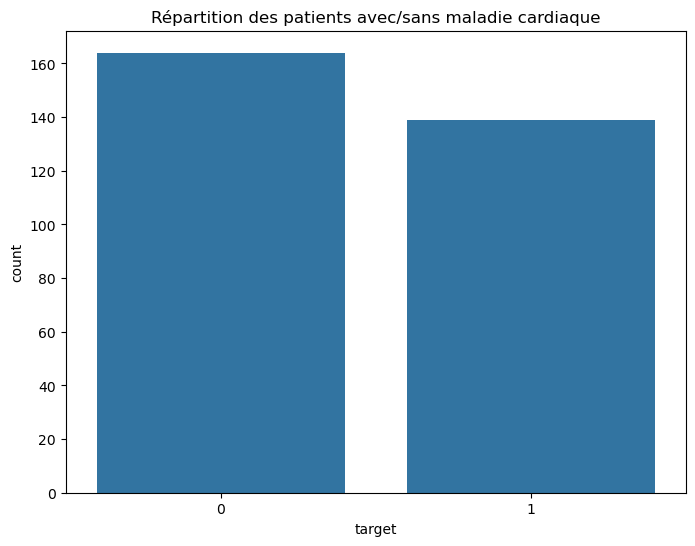


Matrice de confusion pour Logistic Regression:
[[25  4]
 [ 3 29]]


Matrice de confusion pour KNN:
[[27  2]
 [ 3 29]]


Matrice de confusion pour SVM:
[[27  2]
 [ 4 28]]


Matrice de confusion pour Decision Tree:
[[23  6]
 [ 8 24]]


Matrice de confusion pour Random Forest:
[[26  3]
 [ 5 27]]


Matrice de confusion pour AdaBoost:
[[27  2]
 [ 4 28]]

                     Accuracy   AUC-ROC  Precision   Recall  F1-Score
Logistic Regression  0.885246  0.920259   0.878788  0.90625  0.892308
KNN                  0.918033  0.955280   0.935484  0.90625  0.920635
SVM                  0.901639  0.938578   0.933333  0.87500  0.903226
Decision Tree        0.770492  0.771552   0.800000  0.75000  0.774194
Random Forest        0.868852  0.944504   0.900000  0.84375  0.870968
AdaBoost             0.901639  0.939116   0.933333  0.87500  0.903226


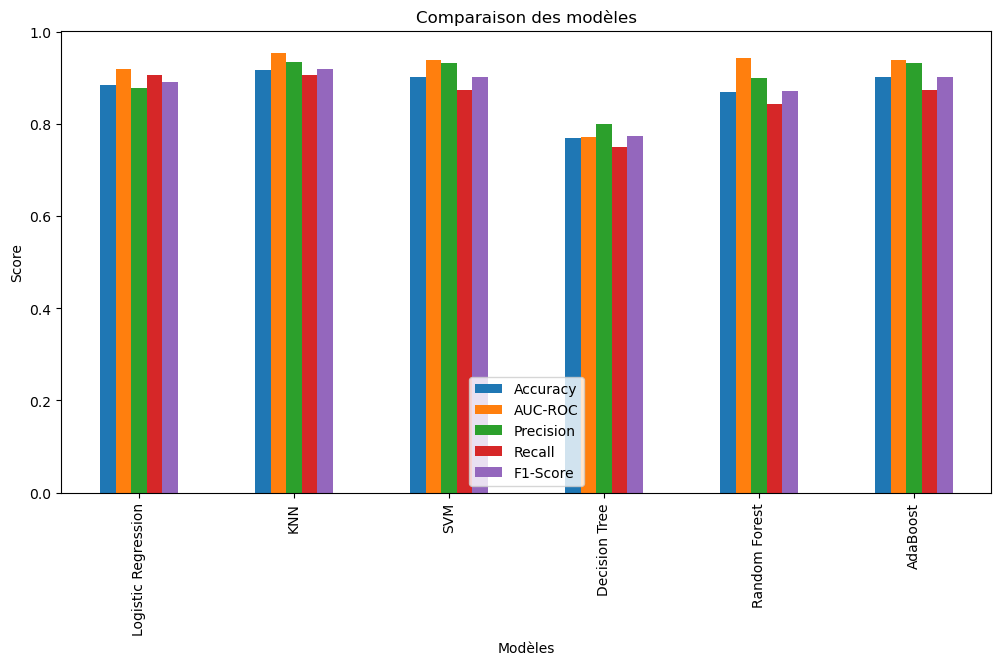

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Algorithmes de classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Charger le dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
           "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, names=columns, na_values="?")

# Convertir target en binaire (1: maladie, 0: pas de maladie)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# Vérification de la répartition des classes
print("Distribution des classes :")
print(df["target"].value_counts(normalize=True))  # Vérifier si le dataset est équilibré

# Remplacement des valeurs manquantes
df.fillna(df.median(), inplace=True)

# 🔍 Exploration des données
plt.figure(figsize=(8, 6))
sns.countplot(x=df["target"])
plt.title("Répartition des patients avec/sans maladie cardiaque")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Séparation des variables
X = df.drop("target", axis=1)
y = df["target"]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME")
}

# Entraînement et évaluation des modèles
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Pour AUC-ROC

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMatrice de confusion pour {name}:\n{cm}\n")

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob),
        "Precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
        "F1-Score": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"]
    }

# Affichage des résultats sous forme de tableau
df_results = pd.DataFrame(results).T
print(df_results)

# 🔍 Visualisation des performances des modèles
df_results.plot(kind='bar', figsize=(12, 6))
plt.title("Comparaison des modèles")
plt.xlabel("Modèles")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


In [3]:
import joblib

# Supposons que Random Forest est le meilleur modèle après comparaison
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, y_train)

# Sauvegarde du modèle entraîné
joblib.dump(best_model, "best_model.pkl")
print("✅ Modèle sauvegardé sous best_model.pkl")

# Sauvegarde du StandardScaler utilisé pour normaliser les données
scaler = StandardScaler()
scaler.fit(X_train)

joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler sauvegardé sous scaler.pkl")


✅ Modèle sauvegardé sous best_model.pkl
✅ Scaler sauvegardé sous scaler.pkl


In [5]:
# Tester si le modèle et le scaler sont bien enregistrés
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Le modèle et le scaler ont été chargés avec succès !")


✅ Le modèle et le scaler ont été chargés avec succès !
